# Last Class

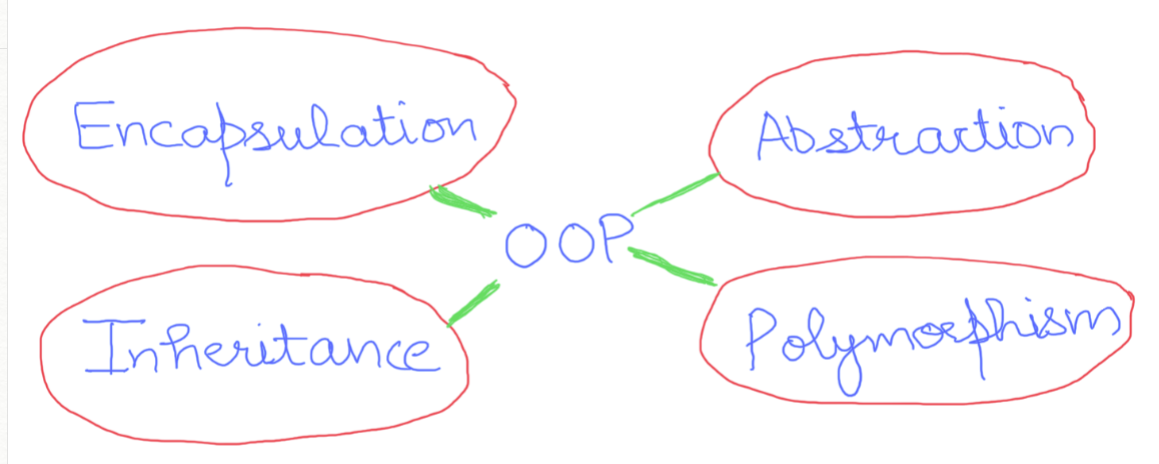

In [34]:
# Review

from IPython.display import Image
Image("figs/oop_principles.png", width = 600, height = 500)

<font size="2"> **Main topics we covered last time:** </font>
<br>
<font size="2">
1.  Classes 

2.  Inheritance

3.  Polymorphism
</font>

In [33]:
# Review: Inheritance and polymorphism

class Animal:
    
    '''This is the base class'''
    def __init__(self, name):
        self.name = name
        print("My name is ", self.name)
    
    def make_sound(self):
        '''All derived classes should override make_sound()'''
        raise NotImplementedError 
        
    
class Dog(Animal):
   
    '''This is a derived class'''
    
    def make_sound(self):      
        return "woof woof" 
    

In [34]:
# Let's call this and see how it works!

mobi = Dog('Mobius')
mobi.make_sound()

My name is  Mobius


'woof woof'

# Today's topics
<br>
<font size="2">
1. Multiple inheritance
<br>
<br>
2. Compositions - motivation, mechanics, intuition
<br>
<br>
3. Dunder methods intro  (time permitting)  
</font>

In [4]:
# Multiple inheritance: a very simple illustration

class Swimmer:
    pass


class Flyer:
    pass


# To inherit from multiple classes, all you have to do is list out all the parent classes

class FlyingFish(Swimmer, Flyer):
    
    def __init__(self, name=''):
        self.name= name


# Create an object of type FlyingFish       
s1 = FlyingFish('Leo')

In [9]:
# Now let's add some methods to this class: 


class Swimmer:
    
    def __init__(self, name=''):
        self.name = name
        
    def make_swim(self):
        print(self.name, "is swimming.")
    
    def make_sound(self):
        print(self.name, "is whistling.")
        
    def make_eat(self):
        print ("Eat corn")


class Flyer:
    
    def __init__(self, name=''):
        self.name = name
        
    def make_fly(self):
        print(self.name, "is flying.") 
    
    def make_sound(self):
        print(self.name, "is chirping.")
        
    def make_eat(self):
        print ("Eat apple")
    

# To inherit from multiple classes, all you have to do is list out all the parent classes

class FlyingFish(Swimmer, Flyer):
    
    def __init__(self, name=''):
        self.name= name
        print(self.name, "is now alive and kicking.")
        

        
    
# Let's create an object of class FlyingFish   
s1 = FlyingFish('Fin') 

# If we call make_fly method on that object, what would happen? 
#s1.make_fly()

# If we call make_fly method on that object, what would happen? 
#s1.make_swim()

# If we call make_sound method on that object, what would happen? 
s1.make_sound()



# Exercise

# Does the order in which we list out the parent classes matter?
# Test it by switching the order in the definition of FlyingFish!

Fin is now alive and kicking.
Fin is whistling.


In [15]:
#######################################################
# Breakout Room Exercise
#######################################################


class Swimmer:
    
    def __init__(self, name=''):
        self.name = name
        
    def make_swim(self):
        print(self.name, "is swimming.")
    
    def make_sound(self):
        print(self.name, "is whistling.")


class Flyer:
    
    def __init__(self, name=''):
        self.name = name
        
    def make_fly(self):
        print(self.name, "is flying.") 
    
    def make_sound(self):
        print(self.name, "is chirping.")



#########################################################        
# Exercise
##########################################################


# Q1) We want to create a robot that has both swim and fly functionalities.
# That means Robot objects should be able to call make_swim() and make_fly()
# How do we do that using multiple inheritance?



# You can start by modifying the following code:

class Robot:
     
    def __init__(self, name=''):
        self.name = name
        print(self.name, "is now alive and using energy.")
        

       
            
        
        
# Q2) Now we want the Robot class to have a make_sound() method that can make
#     its objects whistle and chirp. Check it behaves as you intend it to.










R2D2 is now alive and using energy.
R2D2 is flying.
R2D2 is swimming.
Whistle and chirp


In [144]:
# Solution

class Robot(Swimmer, Flyer):
     
    def __init__(self, name=''):
        self.name = name
        print(self.name, "is now alive and using energy.")
        
    def make_sound(self):    
        print(self.name, "is whistling.")
        print(self.name, "is chirping.")

<font size="2">
<span style="color:blue"> How about the case when we need to derive from a large number of classes?</span>

* Things can get a little complicated if the number of classes to inherit from is large. 
<br>
<br>
* It can make your code hard to follow. 
<br>
<br>
* It is very easy to change or add or rename a method on a class, or to modify an inheritance hierarchy in some way, so that the unintended method is now being called in the derived class or the code breaks.
</font>

# Composition
<br>
<font size="2">
    1. A composite class creates objects of other (component) classes in its definition.
<br>
<br>
    2. By creating the objects inside the class definition, we can access members of the component 
    classes from the composite class.
<br>
<br>
    3. Composition enables creation of complex types by combining objects of different classes.



In [38]:
# Demo: Implementing composition for the previous exercise

# Note that Robot doesn't inherit from any other class

class Robot:
     
    def __init__(self, name=''):
        
        '''This is an example of composition.'''
        self.name = name  
        print(self.name, "is now alive and using energy.")       

        
        
        
# Test


In [ ]:
# Solution to composition demo

class Robot:
     
    def __init__(self, name=''):
        '''This is an example of composition.'''
        self.name = name
        self.swimmer = Swimmer(self.name)
        self.flyer = Flyer(self.name)
        print(self.name, "is now alive and using energy.")
        
    def make_sound(self):
        '''It can both chirp and whistle.'''
        self.swimmer.make_sound()
        self.flyer.make_sound()
        


s1 = Robot('Bender') 
s1.swimmer.make_swim()

In [20]:
# Illustration

class Component:
    
    def __init__(self):
        pass
        
    def do_something(self):
        print("Doing somehting from the Component!")

        
class Composite:
    
    def __init__(self):    
        self.component = Component()
        
        
    def do_something(self):   
        self.component.do_something()
    

In [39]:
# Give an example where there is-a vs has-a relationship.

### How does composition paradigm differ from inheritance?
<br>
<font size="2">
1. Inheritance addresses <span style="color:blue">is-a</span> relationship. 
<br>
<br>
2. Composition addresses <span style="color:blue"> has-a</span> relationship.
<br>
<br>
3. Composition consists of a class being composed of instances of one or more other classes.
<br>
<br>
4. Inheritance is used where a class wants to derive the nature of parent class and then modify or extend the functionality of it.

</font>

## Dunder methods

In [22]:
# Everything in Python inherits from the object class.

#help(object)
dir(object)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

##  \__str\__()
<br>

This method returns the string representation of the object. It is called when print() or str() function is invoked on an object.

##  \__repr\__()
<br>
Python __repr__() function returns the object representation in string format. This method is called when repr() function is invoked on the object. 


In [162]:

# For further references on the difference between these two methods
# https://stackoverflow.com/questions/1436703/difference-between-str-and-repr


class Swimmer:
    '''Swimmer objects have a name, can swim and make sound.'''
    def __init__(self, name=''):
        self.name = name
        
    def make_swim(self):
        print(self.name, "is swimming.")
    
    def make_sound(self):
        print(self.name, "is whistling.")


In [26]:
# Demo

fish = Swimmer('Dory')

print(fish)
print(str(fish))
print(repr(fish))


### Question


<font size="2">
If every things inherits from the object class and these are methods in the object class, can I override them in my class?
</font>

### Tips:

1. The \__str\__ string representation should be human-friendly.

2. The \__repr\__ representation should contain information about object so that it could be constructed again. 
 
 For further reference: 
 https://stackoverflow.com/questions/1436703/difference-between-str-and-repr

In [27]:
# Exercise


class Swimmer:
    '''Swimmer objects have a name, can swim and make sound.'''
    def __init__(self, name=''):
        self.name = name
        
    def make_swim(self):
        print(self.name, "is swimming.")
    
    def make_sound(self):
        print(self.name, "is whistling.")
        
    def __str__(self):
        return 'My name is {}.'.format(self.name)
    
    def __repr__(self):
        return f'Swimmer(name="{self.name}")'
    

# Test the following lines of code. How do they differ from earlier?

fish = Swimmer('Dory')


# Print information about this object using print(), str() and repr() methods.
# What do you observe?

print(fish)
print(str(fish))
print(repr(fish))

My name is Dory.
My name is Dory.
Swimmer(name="Dory")


In [28]:
s1 = Swimmer(name="Dory")

# Today's summary:
<br>
<font size="2">
1. Inheritance <span style="color:blue">is-a</span> relationship.
<br>
<br>
2. Composition <span style="color:blue">has-a</span> relationship.
<br>
<br>    
3. Overriding the dunder methods in your class implementation.

# Skill check

<br>
<font size="2">
You should be able to: 

1. create single, multiple inheritances and override emthods.
<br>
2. create a composite class and use functionality from the component class.
<br>
3. know the basic difference between inheritance and composition.
<br>    
4. override the \__str\__ method with a user-friendly version in your own class.


# Coming up ...

1. Dunder methods continued
2. Class methods and static methods
3. Duck Typing (Python programming model)

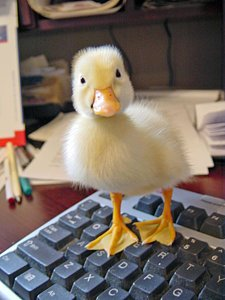

In [21]:
from IPython.display import Image
Image("figs/duck_typing.jpeg")

# image source: Twitter


"If it looks like a duck, swims like a duck, and quacks like a duck, then it probably is a duck."